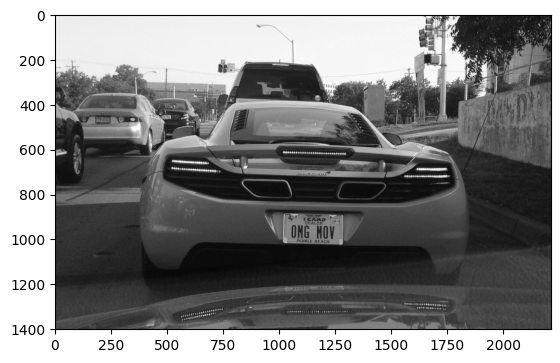

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
img = cv2.imread('images/car_plates1.jfif')
img_gray = cv2.cvtColor(img ,cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(img_gray ,cv2.COLOR_BGR2RGB))

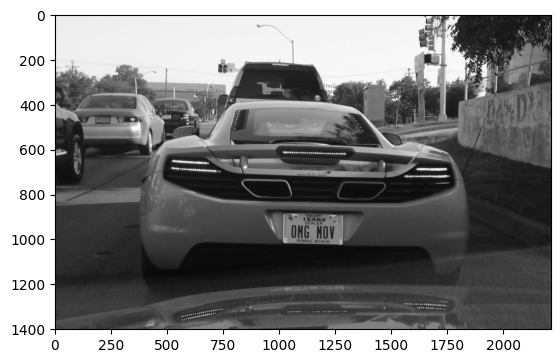

In [132]:
bfilter = cv2.bilateralFilter(img_gray , 11,17 ,17)
edged = cv2.Canny(bfilter , 30 , 200)
plt.imshow(cv2.cvtColor(edged ,cv2.COLOR_BGR2RGB))

In [30]:
key_points = cv2.findContours(edged , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
grape = imutils.grab_contours(key_points)
contours = sorted(grape , key = cv2.contourArea , reverse=True)[:10]
contours

[array([[[1024,  886]],
 
        [[1023,  887]],
 
        [[1022,  887]],
 
        [[1019,  890]],
 
        [[1018,  890]],
 
        [[1018,  892]],
 
        [[1017,  893]],
 
        [[1017,  939]],
 
        [[1016,  940]],
 
        [[1016,  941]],
 
        [[1017,  942]],
 
        [[1017,  943]],
 
        [[1016,  944]],
 
        [[1016,  965]],
 
        [[1015,  966]],
 
        [[1015, 1009]],
 
        [[1014, 1010]],
 
        [[1015, 1011]],
 
        [[1014, 1012]],
 
        [[1015, 1013]],
 
        [[1015, 1014]],
 
        [[1019, 1018]],
 
        [[1021, 1018]],
 
        [[1022, 1019]],
 
        [[1025, 1019]],
 
        [[1026, 1020]],
 
        [[1034, 1020]],
 
        [[1035, 1019]],
 
        [[1036, 1020]],
 
        [[1060, 1020]],
 
        [[1061, 1021]],
 
        [[1099, 1021]],
 
        [[1100, 1022]],
 
        [[1126, 1022]],
 
        [[1127, 1023]],
 
        [[1172, 1023]],
 
        [[1173, 1024]],
 
        [[1205, 1024]],
 
        [[12

In [31]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour , 10, True)
    if len(approx) == 4 :
        location = approx
        break
len(location)

4

In [32]:
mask = np.zeros(img_gray.shape , np.uint8)
new_img = cv2.drawContours(mask , [location] , -1 , 255 , -1)
new_img = cv2.bitwise_and(img , img ,mask = mask)

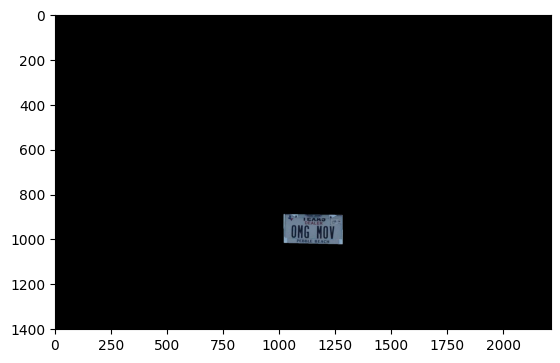

In [33]:
plt.imshow(cv2.cvtColor(new_img ,cv2.COLOR_BGR2RGB))

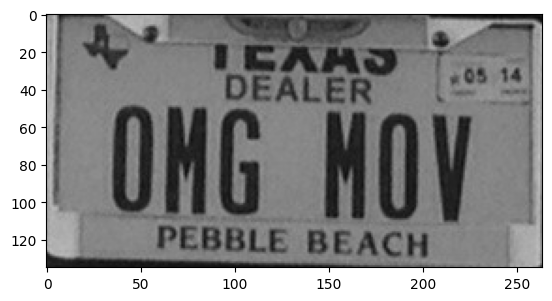

In [34]:
(x , y) = np.where(mask == 255)
(x1,y1) = (np.min(x) , np.min(y))
(x2,y2) = (np.max(x) , np.max(y))

cropped = img_gray[x1:x2+1 , y1:y2+1]
plt.imshow(cv2.cvtColor(cropped ,cv2.COLOR_BGR2RGB))

In [35]:
ocr = easyocr.Reader(['en'])
result = ocr.readtext(cropped)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dell\anaconda3\envs\myenv\lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

[([[85, 10], [190, 10], [190, 37], [85, 37]], 'LEAAJ', 0.16491728062830208),
 ([[90, 28], [178, 28], [178, 52], [90, 52]], 'DEALER', 0.9994963168220576),
 ([[24, 40], [236, 40], [236, 120], [24, 120]], 'OHG Mov', 0.579710752118949),
 ([[53, 106], [208, 106], [208, 135], [53, 135]],
  'PEBBLE BEACH',
  0.988120716566744)]

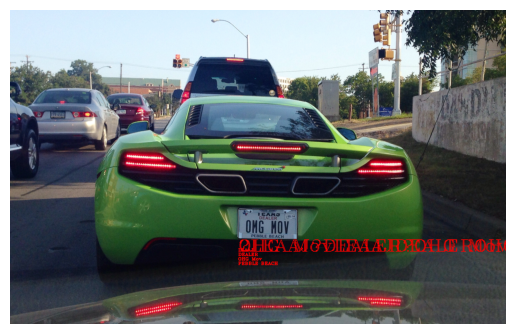

In [79]:
text = ''
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
line_height = 20  

for i in range(len(result)):
    text = text + result[i][-2] + '\n'

lines = text.split('\n')

x, y = approx[0][0][0], approx[1][0][1] + 60

for line in lines:
    res = cv2.putText(img, line, (x, y), font, 1, (0, 0, 255), 2)
    y += line_height  

res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (22, 22, 34), 2)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

In [74]:
print(text)

	LEAAJ	DEALER	OHG Mov	PEBBLE BEACH


In [37]:
text

'OHG Mov'

In [148]:
def imageOCR(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img ,cv2.COLOR_RGB2GRAY)
    
    bfilter = cv2.bilateralFilter(img_gray , 11,17 ,17)
    edged = cv2.Canny(bfilter , 30 , 200)
    
    key_points = cv2.findContours(edged , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    grape = imutils.grab_contours(key_points)
    
    contours = sorted(grape , key = cv2.contourArea , reverse=True)[:10]
    
    
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour , 10, True)
        if len(approx) == 4 :
            location = approx
            break
    
    
    mask = np.zeros(img_gray.shape , np.uint8)
    new_img = cv2.drawContours(mask , [location] , -1 , 255 , -1)
    new_img = cv2.bitwise_and(img , img ,mask = mask)

    (x , y) = np.where(mask == 255)
    (x1,y1) = (np.min(x) , np.min(y))
    (x2,y2) = (np.max(x) , np.max(y))

    cropped = img_gray[x1:x2+1 , y1:y2+1]
    bfilter = cv2.bilateralFilter(cropped , 11,17 ,17)


    ocr = easyocr.Reader(['en'])
    result = ocr.readtext(bfilter)


    text = ''
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    line_height = 70  

    for i in range(len(result)):
        text = text + result[i][-2] + '\n'

    lines = text.split('\n')

    x, y = approx[0][0][0], approx[1][0][1]+  50

    for line in lines:
        res = cv2.putText(img, line, (x, y), font, 3, (0, 0, 255), 5)
        y += line_height  

    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (9, 200, 34), 10)

    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.axis('off') 
    plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


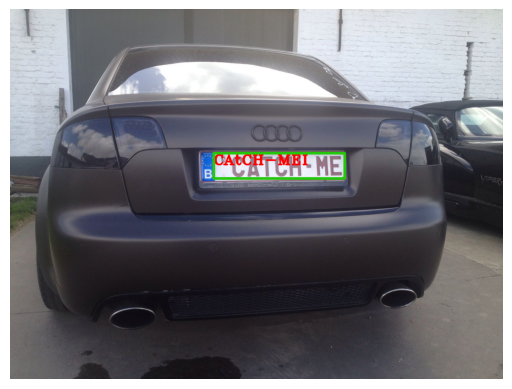

In [149]:
imageOCR('images/car_plates2.jfif')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


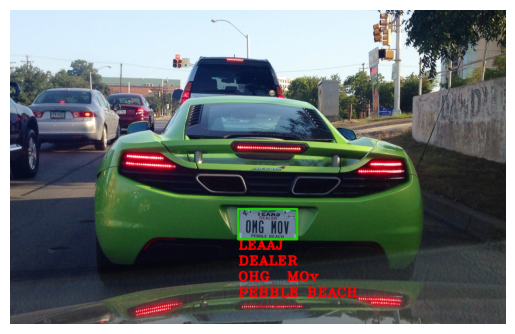

In [150]:
imageOCR('images/car_plates1.jfif')